## 신경망 적용해보기

MNIST
- 딥러닝 계의 Hello World
  - MNIST와 Fashion-MNIST

- MNIST 미국 손글씨 흑백숫자   
1~9까지 숫자를 예측하는 다중 분류 문제

- 학습데이터 6만, 테스트데이터 1만개

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다,
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


### 데이터 형태 확인

In [ ]:
# 훈련 데이터
print('훈련데이터 \n',x_train.shape, y_train.shape)
print(y_train)

print('테스트데이터 \n',x_test.shape, y_test.shape)
print(y_test)

훈련데이터 
 (60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
테스트데이터 
 (10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


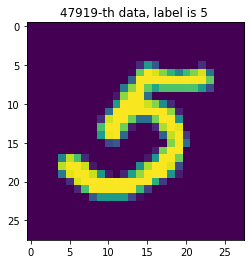

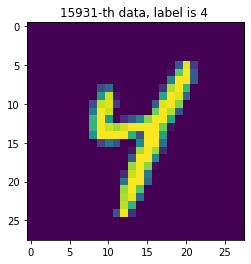

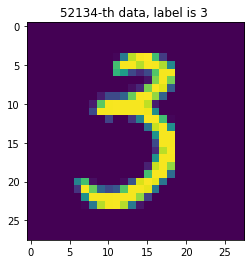

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다
random_idx = np.random.randint(60000, size =sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d ' % (idx,label))

Text(0.5, 1.0, '52134-th data, label is 7')

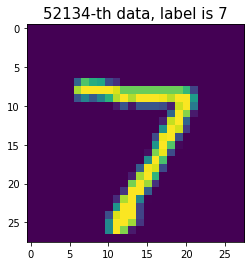

In [ ]:
# 마지막에 예측해볼 데이터
img = x_test[0,:]
label = y_test[0]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx, label), fontsize = 15)

In [ ]:
# 컴퓨터가 보는 이미지
x_test[0,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
for i in x_train[4]:
  for j in i:
    print('{:4}'.format(j), end="")
  print('\n')

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0

   0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state = 777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)

(42000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical

# 각 데이터를 범주형 데이터로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense
model.add(Dense(64, activation = 'relu', input_shape = (784,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/20
329/329 [==============================] - 2s 4ms/step - loss: 0.5289 - acc: 0.8507 - val_loss: 0.2571 - val_acc: 0.9254
Epoch 2/20
329/329 [==============================] - 1s 4ms/step - loss: 0.2131 - acc: 0.9385 - val_loss: 0.1904 - val_acc: 0.9457
Epoch 3/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1606 - acc: 0.9531 - val_loss: 0.1591 - val_acc: 0.9536
Epoch 4/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1283 - acc: 0.9627 - val_loss: 0.1381 - val_acc: 0.9592
Epoch 5/20
329/329 [==============================] - 1s 4ms/step - loss: 0.1061 - acc: 0.9692 - val_loss: 0.1315 - val_acc: 0.9608
Epoch 6/20
329/329 [==============================] - 1s 4ms/step - loss: 0.0910 - acc: 0.9732 - val_loss: 0.1164 - val_acc: 0.9654
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0783 - acc: 0.9767 - val_loss: 0.1080 - val_acc: 0.9674
Epoch 8/20
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

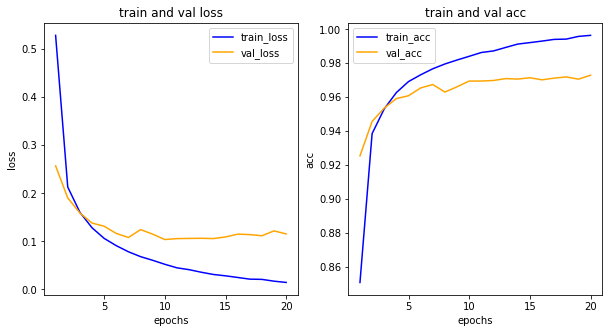

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense
model.add(Dense(256, activation = 'relu', input_shape = (784,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 256,
                    validation_data = (x_val, y_val))

Epoch 1/10
165/165 [==============================] - 2s 7ms/step - loss: 0.9521 - acc: 0.6867 - val_loss: 0.5212 - val_acc: 0.8352
Epoch 2/10
165/165 [==============================] - 1s 5ms/step - loss: 0.3008 - acc: 0.9232 - val_loss: 0.2103 - val_acc: 0.9464
Epoch 3/10
165/165 [==============================] - 1s 7ms/step - loss: 0.1564 - acc: 0.9586 - val_loss: 0.1527 - val_acc: 0.9582
Epoch 4/10
165/165 [==============================] - 1s 6ms/step - loss: 0.1109 - acc: 0.9692 - val_loss: 0.1411 - val_acc: 0.9603
Epoch 5/10
165/165 [==============================] - 1s 6ms/step - loss: 0.0802 - acc: 0.9775 - val_loss: 0.1287 - val_acc: 0.9646
Epoch 6/10
165/165 [==============================] - 1s 6ms/step - loss: 0.0627 - acc: 0.9835 - val_loss: 0.1182 - val_acc: 0.9677
Epoch 7/10
165/165 [==============================] - 1s 5ms/step - loss: 0.0474 - acc: 0.9870 - val_loss: 0.1307 - val_acc: 0.9644
Epoch 8/10
165/165 [==============================] - 1s 5ms/step - loss: 0.

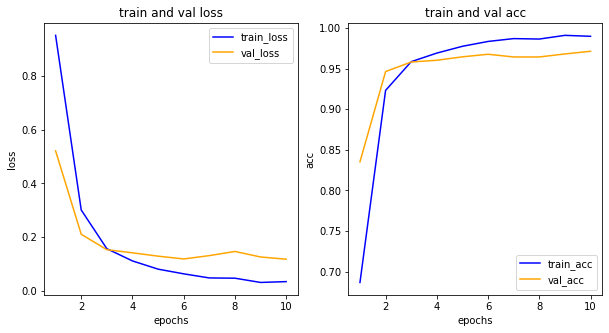

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1093 - acc: 0.9734


[0.10932368040084839, 0.9733999967575073]

### 학습된 모델을 통해 값 예측하기

In [ ]:
np.set_printoptions(precision=7) #소수점 제한

results = model.predict(x_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[4.9299491e-05 1.0491213e-07 7.9791823e-07 7.7847392e-07 9.6935503e-07
 1.2704134e-14 9.3801107e-05 9.9985123e-01 6.5186822e-07 2.2927015e-06]


In [ ]:
np.argmax(y_test, axis = -1) # 가장 큰순서의 인덱스 -> 1을 뽑아옴 (정답)
np.argmax(results, axis = -1) # 가장 큰수를 가져옴 -> 예측값 

array([7, 2, 1, ..., 4, 5, 6])

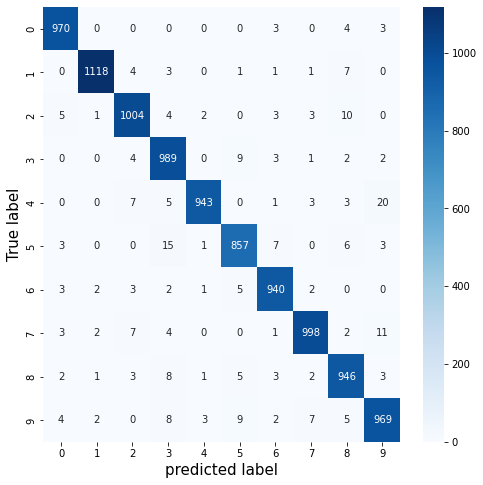

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (8,8))
cm = confusion_matrix(np.argmax(y_test, axis = -1), # argmax
                       np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('True label', fontsize = 15)
plt.show()

In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1),
                                  np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

